In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [40]:
def gadget_spline(r, h):
    pre = 8 / (np.pi * h**3)
    ans = np.zeros_like(r)
    ans0 = 1 - 6*(r/h)**2 + 6 * (r/h)**3
    ans1 = 2 * (1-r/h)**3
    
    key0 = r/h <= 0.5
    key1 = np.logical_and(r/h > 0.5, r/h <= 1)
    ans[key0] = ans0[key0]
    ans[key1] = ans1[key1]
    
    ans *= pre
    
    return ans

1.0000000000000002


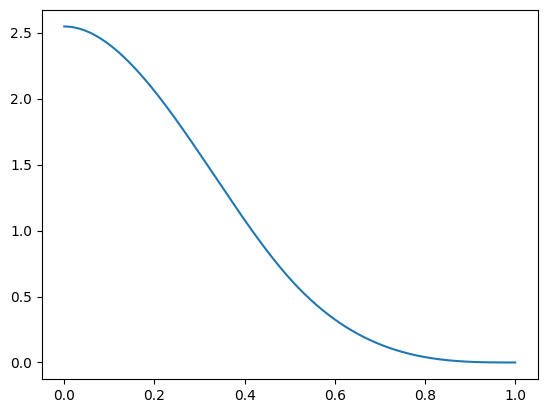

In [15]:
rlist = np.linspace(0, 1, 10000)
h = 1

y = gadget_spline(rlist, h)
plt.plot(rlist, y)
print(np.trapz(4*np.pi*rlist**2*y, rlist))

In [19]:
blist = np.linspace(0, 1, 1000)
slist = np.linspace(-1, 1, 10000)
bgrid, sgrid = np.meshgrid(blist, slist, indexing='ij')

In [30]:
rgrid = np.sqrt(bgrid**2 + sgrid**2)
Wgrid = gadget_spline(rgrid, 1)

In [35]:
sigma = np.trapz(Wgrid, slist, axis=1)
sigma_interp = interp1d(